In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from utilities import *
from models import HMCModel, HMC_LSTM, CoherentLSTM
from train_model_utilities import * 
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Generate simple data and test 3 models

In [2]:
# generate data 
N = 200
data1 = generate_rectangular_data(3, 4, 2, 3, size=N)
data2 = generate_rectangular_data(6, 8, 4, 5, size=N)
data = np.concatenate([data1, data2])
y1 = np.array([0.0]*N + [1.0]*N)
y2 = np.array([1.0]*N + [0.0]*N)
y3 = np.ones([N*2,1])
y = np.concatenate([y1[:,np.newaxis], y2[:,np.newaxis], y3], axis=1)
structure = np.array([[0,0,1],[0,0,1],[0,0,0]])

(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = split_train_valid_test(data, y)

In [3]:
batch_size = 64
epochs = 400
learning_rate=1e-2

In [4]:
model1 = HMCModel(structure, 3, [10])
loss_fn = get_loss_fn_coherent(structure)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_data = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)
).shuffle(buffer_size = N*2).batch(batch_size=batch_size)
train_step_fn = get_train_step_fn(model1, optimizer, loss_fn, 'coherent_hmc')
for epoch in range(epochs):
    for x_train_batch, y_train_batch in train_data:
        loss, valid_loss = train_step_fn(
            x_train_batch, 
            y_train_batch, 
            (x_valid, y_valid)
        )
    if (epoch + 1) % (epochs // 10) == 0:
        print("epoch {}/{}, loss {}, valid loss {}".format(epoch+1, epochs, loss, valid_loss))
        
print_model_eval_score(model1, 'coherent_hmc', x_train, y_train, x_valid, y_valid, x_test, y_test)

epoch 40/400, loss 0.24104656279087067, valid loss 0.24391953647136688
epoch 80/400, loss 0.04617023840546608, valid loss 0.055352583527565
epoch 120/400, loss 0.02191001921892166, valid loss 0.024649979546666145
epoch 160/400, loss 0.023621829226613045, valid loss 0.016323549672961235
epoch 200/400, loss 0.0059523796662688255, valid loss 0.011375175788998604
epoch 240/400, loss 0.009899633005261421, valid loss 0.00946457777172327
epoch 280/400, loss 0.011181006208062172, valid loss 0.007882690988481045
epoch 320/400, loss 0.0019166248384863138, valid loss 0.0062451232224702835
epoch 360/400, loss 0.0038437391631305218, valid loss 0.005041854456067085
epoch 400/400, loss 0.002166174352169037, valid loss 0.00398711021989584
AU(PRC) 
train: 0.9999978343356588, validation 1.0, test 1.0


In [7]:
model2 = HMC_LSTM(10, 0.5, [2,1], 2)
loss_fn = get_loss_fn_lstm(structure, 0.5, 0.5)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
train_step_fn = get_train_step_fn(model2, optimizer, loss_fn, 'lstm_hmc')
for epoch in range(epochs):
    for x_train_batch, y_train_batch in train_data:
        loss, valid_loss = train_step_fn(
            x_train_batch, 
            y_train_batch, 
            (x_valid, y_valid)
        )
    if (epoch + 1) % (epochs // 10) == 0:
        print("epoch {}/{}, loss {}, valid loss {}".format(epoch+1, epochs, loss, valid_loss))
        
print_model_eval_score(model2, 'lstm_hmc', x_train, y_train, x_valid, y_valid, x_test, y_test)

epoch 40/400, loss 0.12798011302947998, valid loss 0.13868382573127747
epoch 80/400, loss 0.03187961131334305, valid loss 0.034657757729291916
epoch 120/400, loss 0.02332611009478569, valid loss 0.01955314353108406
epoch 160/400, loss 0.023429105058312416, valid loss 0.011818751692771912
epoch 200/400, loss 0.005147560499608517, valid loss 0.008377335034310818
epoch 240/400, loss 0.012806359678506851, valid loss 0.007442173082381487
epoch 280/400, loss 0.0024359598755836487, valid loss 0.004803475458174944
epoch 320/400, loss 0.0035969861783087254, valid loss 0.004092950839549303
epoch 360/400, loss 0.009740754961967468, valid loss 0.004177312832325697
epoch 400/400, loss 0.0021576527506113052, valid loss 0.00311973225325346
AU(PRC) 
train: 1.0, validation 1.0, test 1.0


In [8]:
model3 = CoherentLSTM(10, 0.5, [2,1], 2, structure)
loss_fn = get_loss_fn_coherent(structure)
optimizer = tf.keras.optimizers.Adam(1e-2)
train_step_fn = get_train_step_fn(model3, optimizer, loss_fn, 'coherent_lstm')
for epoch in range(epochs):
    for x_train_batch, y_train_batch in train_data:
        loss, valid_loss = train_step_fn(
            x_train_batch, 
            y_train_batch, 
            (x_valid, y_valid)
        )
    if (epoch + 1) % (epochs // 10) == 0:
        print("epoch {}/{}, loss {}, valid loss {}".format(epoch+1, epochs, loss, valid_loss))
        
print_model_eval_score(model3, 'coherent_lstm', x_train, y_train, x_valid, y_valid, x_test, y_test)

epoch 40/400, loss 0.06825626641511917, valid loss 0.07301826030015945
epoch 80/400, loss 0.014876448549330235, valid loss 0.02218560315668583
epoch 120/400, loss 0.0105137275531888, valid loss 0.012428480200469494
epoch 160/400, loss 0.003024618374183774, valid loss 0.008746640756726265
epoch 200/400, loss 0.006929394323378801, valid loss 0.0069747185334563255
epoch 240/400, loss 0.003787405788898468, valid loss 0.0049867588095366955
epoch 280/400, loss 0.0070106713101267815, valid loss 0.0038296966813504696
epoch 320/400, loss 0.007498203311115503, valid loss 0.002827154705300927
epoch 360/400, loss 0.008971057832241058, valid loss 0.002330430783331394
epoch 400/400, loss 0.008304952643811703, valid loss 0.002916258294135332
AU(PRC) 
train: 1.0, validation 1.0, test 1.0


# Generate complex data and compare 3 models

## Grid in a square

In [2]:
N = 800
data = generate_rectangular_data(0,0,2,2,N)
(x1,x2,y1,y2) = (-0.7, 0.7, -0.7, 0.7)
label_int_2_name = {0:'all', 1:'left', 2:'right', 3:'upper', 4:'lower', 5:'upper left', 
                    6:'upper right', 7:'lower left', 8:'lower right'}

def assign_label(data, x1, x2, y1, y2):
    y = np.zeros([N, 9])
    y[:,0] = 1
    y[:,1] = np.where(data[:,0] <= x1, 1, 0)
    y[:,2] = np.where(data[:,0] > x2, 1, 0)
    y[:,3] = np.where(data[:,1] > y2, 1, 0)
    y[:,4] = np.where(data[:,1] <= y1, 1, 0)
    y[:,5] = np.where((data[:,0] <= x1) & (data[:,1] > y2), 1, 0)
    y[:,6] = np.where((data[:,0] > x2) & (data[:,1] > y2), 1, 0)
    y[:,7] = np.where((data[:,0] <= x1) & (data[:,1] <= y1), 1, 0)
    y[:,8] = np.where((data[:,0] > x2) & (data[:,1] <= y1), 1, 0)
    return y 

y = assign_label(data, x1, x2, y1, y2)
structure = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 0, 0]
])

In [3]:
# split train, valid, test
(x_train, y_train), (x_valid, y_valid), (x_test, y_test) = split_train_valid_test(data, y)

# batch train data 
batch_size = 64
train_data = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)
).shuffle(buffer_size = N).batch(batch_size=batch_size)


In [48]:
learning_rate = 1e-2
epochs = 200 
model1 = HMCModel(structure, 9, [20])
loss_fn = get_loss_fn_coherent(structure)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

train_step_fn = get_train_step_fn(model1, optimizer, loss_fn, 'coherent_hmc')
for epoch in range(epochs):
    for x_train_batch, y_train_batch in train_data:
        loss, valid_loss = train_step_fn(
            x_train_batch, 
            y_train_batch, 
            (x_valid, y_valid)
        )
    if (epoch + 1) % (epochs // 10) == 0:
        print("epoch {}/{}, loss {}, valid loss {}".format(epoch+1, epochs, loss, valid_loss))
        
print_model_eval_score(model1, 'coherent_hmc', x_train, y_train, x_valid, y_valid, x_test, y_test)

epoch 20/200, loss 0.10874809324741364, valid loss 0.08516314625740051
epoch 40/200, loss 0.046086449176073074, valid loss 0.058226246386766434
epoch 60/200, loss 0.04298800230026245, valid loss 0.05066411942243576
epoch 80/200, loss 0.04981210082769394, valid loss 0.0471133328974247
epoch 100/200, loss 0.03852337598800659, valid loss 0.04379596188664436
epoch 120/200, loss 0.04977623000741005, valid loss 0.04235325753688812
epoch 140/200, loss 0.034783586859703064, valid loss 0.0419049970805645
epoch 160/200, loss 0.05221181362867355, valid loss 0.03959105908870697
epoch 180/200, loss 0.05668099597096443, valid loss 0.04171271622180939
epoch 200/200, loss 0.04271060973405838, valid loss 0.03882627934217453
AU(PRC) 
train: 0.9950568170453984, validation 0.9931325751826723, test 0.9936009540774329


In [49]:
model2 = HMC_LSTM(10, 0.5, [1, 4, 4], 3)
loss_fn = get_loss_fn_lstm(structure, 0.5, 0.5)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
train_step_fn = get_train_step_fn(model2, optimizer, loss_fn, 'lstm_hmc')
for epoch in range(epochs):
    for x_train_batch, y_train_batch in train_data:
        loss, valid_loss = train_step_fn(
            x_train_batch, 
            y_train_batch, 
            (x_valid, y_valid)
        )
    if (epoch + 1) % (epochs // 10) == 0:
        print("epoch {}/{}, loss {}, valid loss {}".format(epoch+1, epochs, loss, valid_loss))
        
print_model_eval_score(model2, 'lstm_hmc', x_train, y_train, x_valid, y_valid, x_test, y_test)

epoch 20/200, loss 0.16037175059318542, valid loss 0.1503029763698578
epoch 40/200, loss 0.048256974667310715, valid loss 0.055528365075588226
epoch 60/200, loss 0.0314185693860054, valid loss 0.033141396939754486
epoch 80/200, loss 0.0269512627273798, valid loss 0.029593585059046745
epoch 100/200, loss 0.029599834233522415, valid loss 0.023017430678009987
epoch 120/200, loss 0.011349653825163841, valid loss 0.022566748782992363
epoch 140/200, loss 0.01314354594796896, valid loss 0.02277875505387783
epoch 160/200, loss 0.012446343898773193, valid loss 0.01662961207330227
epoch 180/200, loss 0.007814988493919373, valid loss 0.025553222745656967
epoch 200/200, loss 0.010632765479385853, valid loss 0.01981385610997677
AU(PRC) 
train: 0.9999992644793849, validation 0.9977912531047508, test 0.999993266531364


In [50]:
model3 = CoherentLSTM(10, 0.5, [1, 4, 4], 3, structure)
loss_fn = get_loss_fn_coherent(structure)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
train_step_fn = get_train_step_fn(model3, optimizer, loss_fn, 'coherent_lstm')
for epoch in range(epochs):
    for x_train_batch, y_train_batch in train_data:
        loss, valid_loss = train_step_fn(
            x_train_batch, 
            y_train_batch, 
            (x_valid, y_valid)
        )
    if (epoch + 1) % (epochs // 10) == 0:
        print("epoch {}/{}, loss {}, valid loss {}".format(epoch+1, epochs, loss, valid_loss))
        
print_model_eval_score(model3, 'coherent_lstm', x_train, y_train, x_valid, y_valid, x_test, y_test)

epoch 20/200, loss 0.1717752069234848, valid loss 0.1616838276386261
epoch 40/200, loss 0.09314855933189392, valid loss 0.0876845121383667
epoch 60/200, loss 0.057259202003479004, valid loss 0.0652986690402031
epoch 80/200, loss 0.06603892147541046, valid loss 0.060226909816265106
epoch 100/200, loss 0.04537113755941391, valid loss 0.05114007741212845
epoch 120/200, loss 0.04695947840809822, valid loss 0.04253528267145157
epoch 140/200, loss 0.032057903707027435, valid loss 0.04649890959262848
epoch 160/200, loss 0.04562141001224518, valid loss 0.042584940791130066
epoch 180/200, loss 0.059920407831668854, valid loss 0.04141862690448761
epoch 200/200, loss 0.019298110157251358, valid loss 0.039662498980760574
AU(PRC) 
train: 0.9999734926486514, validation 0.9989902114584428, test 0.999097376549777


AU(PRC) 
train: 0.9999749130392797, validation 0.9949784678534659, test 0.9999591876811422


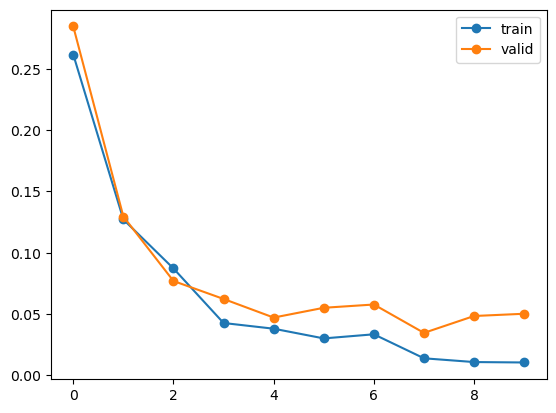

In [4]:
model4 = HMC_LSTM(10, 0.5, [1, 4, 4], 3)
loss_fn = get_loss_fn_log(structure, 0.5)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
train_epoch(model4, optimizer, loss_fn, 'lstm_hmc', 200, train_data, x_train, y_train, x_valid, y_valid, x_test, y_test)

## True data

NameError: name 'generate_cube_data' is not defined